

# Project: Investigate a Dataset - Inside look in movie data: 'tmdb-movies.csv'

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project we are going to analysis data set collected by 'The Movie Database (tmdb)' which contains information about more than 10,000 movies, like budget,revenue,cast,director, genres, release date and so on, between the years 1960 to 2015.
To understand the questions like how many movies made in each decade, top ten movies-cast-directors as per profite made, outlier movie with low budget with high profit and vice versa, we have to take a inside look in the give data set 

In [1]:
#import statement for packages needed

import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
tmdb_movies = pd.read_csv('tmdb-movies.csv')

### Data Cleaning  -know data types of each column and change if needed

In [3]:
#print few row of the data set

tmdb_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
tmdb_movies.dtypes    #data types

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
#change data type of cast,genres and production_companies to string
tmdb_movies['cast']= tmdb_movies['cast'].astype(str)

In [6]:
tmdb_movies['genres']= tmdb_movies['genres'].astype(str)

In [7]:
tmdb_movies['production_companies']= tmdb_movies['production_companies'].astype(str)

In [8]:
tmdb_movies['release_year']= tmdb_movies['release_year'].astype(int)

In [9]:
#change data type of release_date to pandas datetime formate

tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])

In [10]:
# Now we will split the columns - cast, genres and production_companies to get the 1st element, which we will be using
#in comming sections

tmdb_movies['cast'] = pd.DataFrame(tmdb_movies.cast.str.split('|',1).tolist()) #to get the mainlead


In [11]:
tmdb_movies['production_companies'] = pd.DataFrame(tmdb_movies.production_companies.str.split('|',1).tolist())
#to get the main production company

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - How many movies are made in provides decades

To get the answer,we will take to approches.1st- we are going to create the decade bins and 2nd- create a histogram 

In [12]:
# create column 'decade' with bins from 1960 to 2020

bins = [1960,1970,1980,1990,2000,2010,2020]
group_names = ['1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019']

decades = pd.cut(tmdb_movies['release_year'],bins,labels=group_names)
tmdb_movies['decades'] = pd.cut(tmdb_movies['release_year'],bins,labels=group_names)

pd.value_counts(tmdb_movies['decades'])

2000-2009    3825
2010-2019    3116
1990-1999    1860
1980-1989    1117
1970-1979     545
1960-1969     371
Name: decades, dtype: int64

The above analysis show the number of movies made in each decade

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'movies_made_per_decade')

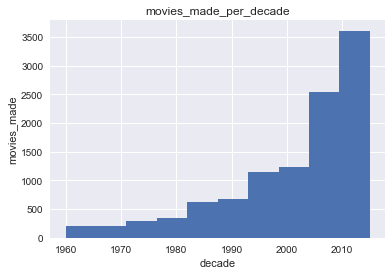

In [14]:
# create histogram with bin = 10

%pylab inline 
import matplotlib.pyplot as plt
import seaborn as sns

pd.DataFrame.hist(tmdb_movies,column='release_year',bins=10)

plt.xlabel('decade')
plt.ylabel('movies_made')
plt.title('movies_made_per_decade')


### Research Question 2 - Overall Profit analysis

We are going to calculate the overall profit made by movies with respect to release year. Top ten movies,cast, director with respect to profit made

In [15]:
#1st calculate profit

tmdb_movies['profit'] = tmdb_movies['revenue'] - tmdb_movies['budget']


1. total profit made by movies in each decade

In [16]:
# to lookup the values between perticular time period

range_date = tmdb_movies.set_index(['release_date'])

In [17]:
profit_60 = (range_date.loc['1/1/1960':'12/31/69']).sum()['profit']  # total movie profit made in decade 1960-1969
profit_70 = (range_date.loc['1/1/1970':'12/31/79']).sum()['profit']  # total movie profit made in decade 1970-1979
profit_80 = (range_date.loc['1/1/1980':'12/31/89']).sum()['profit']  # total movie profit made in decade 1980-1989
profit_90 = (range_date.loc['1/1/1990':'12/31/99']).sum()['profit']  # total movie profit made in decade 1990-1999
profit_00 = (range_date.loc['1/1/2000':'12/31/09']).sum()['profit']  # total movie profit made in decade 2000-2009
profit_10 = (range_date.loc['1/1/2010':'12/31/19']).sum()['profit']  # total movie profit made in decade 2010-2019

Text(0.5,1,'movie_profit')

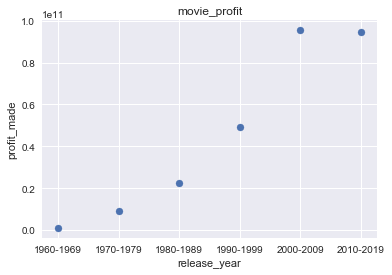

In [18]:
year_range = ('1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019')
profit = (profit_60,profit_70,profit_80,profit_90,profit_00,profit_10)

plt.scatter(year_range,profit)

plt.xlabel('release_year')
plt.ylabel('profit_made')
plt.title('movie_profit')


2. Top ten - movies,cast and director who made hightest profit 

In [19]:
#convert 'profit' to comma separated currency
tmdb_movies['profit']=tmdb_movies['profit'].apply('{:,}'.format)

In [20]:
top_ten_60=(range_date.loc['1/1/1960':'12/31/69']).nlargest(n=10,columns='profit', keep='first')[['original_title','cast','director','profit']]
top_ten_70=(range_date.loc['1/1/1970':'12/31/79']).nlargest(n=10,columns='profit', keep='first')[['original_title','cast','director','profit']]
top_ten_80=(range_date.loc['1/1/1980':'12/31/89']).nlargest(n=10,columns='profit', keep='first')[['original_title','cast','director','profit']]   
top_ten_90=(range_date.loc['1/1/1990':'12/31/99']).nlargest(n=10,columns='profit', keep='first')[['original_title','cast','director','profit']]   
top_ten_00=(range_date.loc['1/1/2000':'12/31/09']).nlargest(n=10,columns='profit', keep='first')[['original_title','cast','director','profit']]   
top_ten_10=(range_date.loc['1/1/2010':'12/31/19']).nlargest(n=10,columns='profit', keep='first')[['original_title','cast','director','profit']]   

In [22]:
top_ten_60

,original_title,cast,director,profit
release_date,,,,
1967-10-18,The Jungle Book,Phil Harris,Wolfgang Reitherman,201843612
1967-06-12,You Only Live Twice,Sean Connery,Lewis Gilbert,102084787
1967-12-21,The Graduate,Anne Bancroft,Mike Nichols,101397102
1969-09-23,Butch Cassidy and the Sundance Kid,Paul Newman,George Roy Hill,96308889
1969-12-12,On Her Majesty's Secret Service,George Lazenby,Peter R. Hunt,74974493
1967-12-11,Guess Who's Coming to Dinner,Spencer Tracy,Stanley Kramer,52666667
1967-07-18,Bonnie and Clyde,Warren Beatty,Arthur Penn,48200000
1967-12-27,Valley of the Dolls,Barbara Parkins,Mark Robson,45000000
1968-04-05,2001: A Space Odyssey,Keir Dullea,Stanley Kubrick,44715371


In [63]:
top_ten_70

,original_title,cast,director,profit
release_date,,,,
1977-03-20,Star Wars,Mark Hamill,George Lucas,764398007
1975-06-18,Jaws,Roy Scheider,Steven Spielberg,463654000
1973-12-26,The Exorcist,Linda Blair,William Friedkin,433306145
1977-11-16,Close Encounters of the Third Kind,Richard Dreyfuss,Steven Spielberg,283788635
1978-12-14,Superman,Marlon Brando,Richard Donner,245218018
1972-03-15,The Godfather,Marlon Brando,Francis Ford Coppola,239066411
1977-12-16,Saturday Night Fever,John Travolta,John Badham,233613184
1979-06-15,Rocky II,Sylvester Stallone,Sylvester Stallone,193182160
1979-06-26,Moonraker,Roger Moore,Lewis Gilbert,176300000


In [64]:
top_ten_80

,original_title,cast,director,profit
release_date,,,,
1982-04-03,E.T. the Extra-Terrestrial,Henry Thomas,Steven Spielberg,782410554
1983-05-23,Return of the Jedi,Mark Hamill,Richard Marquand,540350000
1980-01-01,The Empire Strikes Back,Mark Hamill,Irvin Kershner,520400000
1989-05-24,Indiana Jones and the Last Crusade,Harrison Ford,Steven Spielberg,426171806
1989-06-23,Batman,Jack Nicholson,Tim Burton,376348924
1981-06-12,Raiders of the Lost Ark,Harrison Ford,Steven Spielberg,371925971
1985-07-03,Back to the Future,Michael J. Fox,Robert Zemeckis,362109762
1986-05-16,Top Gun,Tom Cruise,Tony Scott,341830601
1988-12-11,Rain Man,Dustin Hoffman,Barry Levinson,329825435


In [65]:
top_ten_90

,original_title,cast,director,profit
release_date,,,,
1997-11-18,Titanic,Kate Winslet,James Cameron,1645034188
1995-07-28,The Net,Sandra Bullock,Irwin Winkler,1084279658
1993-06-11,Jurassic Park,Sam Neill,Steven Spielberg,857100000
1999-05-19,Star Wars: Episode I - The Phantom Menace,Liam Neeson,George Lucas,809317558
1994-06-23,The Lion King,Jonathan Taylor Thomas,Roger Allers|Rob Minkoff,743241776
1996-06-25,Independence Day,Will Smith,Roland Emmerich,741969268
1999-08-02,The Sixth Sense,Bruce Willis,M. Night Shyamalan,632806292
1994-07-06,Forrest Gump,Tom Hanks,Robert Zemeckis,622945399
1997-07-01,Men in Black,Tommy Lee Jones,Barry Sonnenfeld,499390539


In [66]:
top_ten_00

,original_title,cast,director,profit
release_date,,,,
2009-12-10,Avatar,Sam Worthington,James Cameron,2544505847
2003-12-01,The Lord of the Rings: The Return of the King,Elijah Wood,Peter Jackson,1024888979
2006-06-20,Pirates of the Caribbean: Dead Man's Chest,Johnny Depp,Gore Verbinski,865659812
2001-11-16,Harry Potter and the Philosopher's Stone,Daniel Radcliffe,Chris Columbus,851475550
2002-12-18,The Lord of the Rings: The Two Towers,Elijah Wood,Peter Jackson,847287400
2008-07-16,The Dark Knight,Christian Bale,Christopher Nolan,816921825
2009-06-29,Ice Age: Dawn of the Dinosaurs,Ray Romano,Carlos Saldanha,796686817
2007-06-28,Harry Potter and the Order of the Phoenix,Daniel Radcliffe,David Yates,788212738
2001-12-18,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,Peter Jackson,778368364


In [67]:
top_ten_10

,original_title,cast,director,profit
release_date,,,,
2015-12-15,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,1868178225
2015-06-09,Jurassic World,Chris Pratt,Colin Trevorrow,1363528810
2015-04-01,Furious 7,Vin Diesel,James Wan,1316249360
2012-04-25,The Avengers,Robert Downey Jr.,Joss Whedon,1299557910
2011-07-07,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe,David Yates,1202817822
2015-04-22,Avengers: Age of Ultron,Robert Downey Jr.,Joss Whedon,1125035767
2013-11-27,Frozen,Kristen Bell,Chris Buck|Jennifer Lee,1124219009
2015-06-17,Minions,Sandra Bullock,Kyle Balda|Pierre Coffin,1082730962
2013-04-18,Iron Man 3,Robert Downey Jr.,Shane Black,1015439994


In [68]:
#Top ten of all time

tmdb_movies.nlargest(n=10,columns='profit', keep='first')[['original_title','cast','director','profit']]

,original_title,cast,director,profit
1386,Avatar,Sam Worthington,James Cameron,2544505847
3,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,1868178225
5231,Titanic,Kate Winslet,James Cameron,1645034188
0,Jurassic World,Chris Pratt,Colin Trevorrow,1363528810
4,Furious 7,Vin Diesel,James Wan,1316249360
4361,The Avengers,Robert Downey Jr.,Joss Whedon,1299557910
3374,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe,David Yates,1202817822
14,Avengers: Age of Ultron,Robert Downey Jr.,Joss Whedon,1125035767
5422,Frozen,Kristen Bell,Chris Buck|Jennifer Lee,1124219009
8094,The Net,Sandra Bullock,Irwin Winkler,1084279658


### Research Question 3 - Most popular movie

In [25]:
ten_most_popular_movies = tmdb_movies.nlargest(n=10,columns='popularity', keep='first')[['original_title','release_year','popularity']]

In [26]:
ten_most_popular_movies

,original_title,release_year,popularity
0,Jurassic World,2015,32.985763
1,Mad Max: Fury Road,2015,28.419936
629,Interstellar,2014,24.949134
630,Guardians of the Galaxy,2014,14.311205
2,Insurgent,2015,13.112507
631,Captain America: The Winter Soldier,2014,12.971027
1329,Star Wars,1977,12.037933
632,John Wick,2014,11.422751
3,Star Wars: The Force Awakens,2015,11.173104
633,The Hunger Games: Mockingjay - Part 1,2014,10.739009


Seems like 'Jurassic World' is the most popular movie made till 2015

In [27]:
ten_least_popular_movies=tmdb_movies.sort_values('popularity',ascending=True).head(10)[['original_title','release_year','popularity']]

In [28]:
ten_least_popular_movies

,original_title,release_year,popularity
6181,"North and South, Book I",1985,0.000065
9977,The Hospital,1971,0.000188
6080,G.B.F.,2013,0.000620
6551,Mon petit doigt m'a dit...,2005,0.000973
6961,Khosla Ka Ghosla!,2006,0.001115
7268,Born into Brothels,2004,0.001117
7256,SoupÃ§ons,2004,0.001315
3370,Fuera de carta,2008,0.001317
2874,Slashers,2001,0.001349
4948,The Invisible War,2012,0.001372


### Research Question 4 - To know what 'genres' has most number of movies made

In [30]:
genres_with_most_movies = tmdb_movies.groupby(tmdb_movies.genres.tolist()).size().reset_index().rename(columns={0:'count'})

In [34]:
genres_with_most_movies=genres_with_most_movies.sort_values('count',ascending=False).head(25)
genres_with_most_movies

,index,count
686,Comedy,712
984,Drama,712
957,Documentary,312
1195,Drama|Romance,289
732,Comedy|Drama,280
847,Comedy|Romance,268
1547,Horror|Thriller,259
1478,Horror,253
766,Comedy|Drama|Romance,222
1228,Drama|Thriller,138


Little laughter is good for health,I think that's the reason most movies are made under genres 'comedy'

### Research Question 5 - Outlier movies,movie with low budget with high profit and vice versa

Text(0.5,1,'outlier_movies')

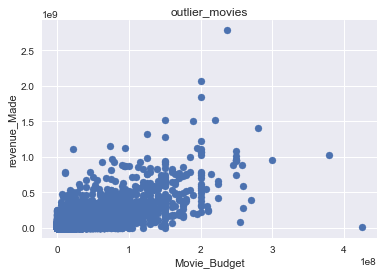

In [19]:
plt.scatter(tmdb_movies['budget'],tmdb_movies['revenue'])

plt.xlabel('Movie_Budget')
plt.ylabel('revenue_Made')
plt.title('outlier_movies')

<a id='conclusions'></a>
## Conclusions

The above analysis shows that 
1. the number of movies made per decade getting higher than previous decade.
2. 'Avatar' is highest grossing movie till 2015.
3. 'Jurassic World' is the most popular movie made till 2015
4. most movies are made under genres 'comedy'
5. there are some outlier movies with low budget with high profit and vice versa

We can explore some more questions like, the production company with highest profit margine, around what season of the year movies profited the most.
with all said, there are some limitations with the data. There are multiple values of some clumns like 'cast', 'production_companies','genres' which make it harder to analyse data for any perticular value. While we can calculate the profit per decade, we have to consider the inflation rate. This data does not take into account the inflation over the period.